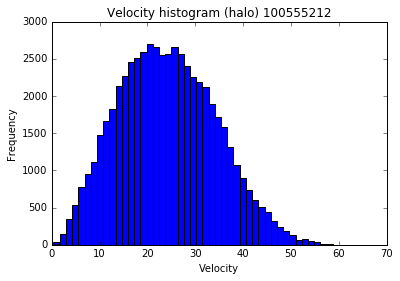

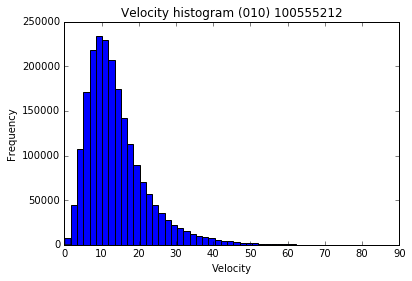

In [4]:
#Julie Chomrak 100555212

import struct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# opens file as binary read only
file = open('/home/julie/Desktop/csci-2000-personal/Large_Data/halo.dat', 'rb')
#converts it into a variable to be used in the next couple lines
filecontent = file.read()

# creates non-numpy arrays using the struct unpack function 
# the first 4 binary bytes is read as an integer and is equal to the number of "situation"
# the next 8 binary bytes are read as a double and is equal to the time of this snapshot (not used)
# the next unknown amount of bytes are read as 4 byte floats and this array contains all "situtations"
# "situations" contain mass, x, y, z, velo of x, velo of y, velo of z
N_halo = struct.unpack('i', filecontent[:4])
T_halo = struct.unpack('d', filecontent[4:12])
data_halo = struct.unpack("f" * ((len(filecontent) - 12) // 4), filecontent[12:])

# must close the file before proceeding
file.close()

# converts the array into a numpy array 
data_halo = np.array(data_halo)
# reshapes the array to the length of N_halo (number of situations (column))...
# ... by 7 (which is the # of components of "situation" (row))
data_halo = np.reshape(data_halo, N_halo + (7,))

# sets the length of v_halo to the value of the first and only value in N_halo
# which is postion 0, the number of situations
v_halo = np.zeros(N_halo[0])

# length refers to the number of 7 length arrays
# basically, whatever number N_halo is
# this normallizes the velocity values into one scalar value
# first by squaring and adding them together then putting them into a newly dimensioned v_halo array
# once the array has been filled then use an np function to square root all values
for i in range(len(data_halo)):
    v_halo[i] = (data_halo[i, 4]**2) + (data_halo[i, 5]**2) + (data_halo[i, 6]**2)
v_halo = np.sqrt(v_halo)

# this plots the v_halo array as a histogram and sets the axes labels and title
plt.hist(v_halo,bins=50)
plt.xlabel('Velocity')
plt.ylabel('Frequency')
plt.title(r'Velocity histogram (halo) 100555212')

plt.show()



#this code is the same as the code above
file = open('/home/julie/Desktop/csci-2000-personal/Large_Data/snapshot_010.dat', 'rb')
filecontent = file.read()

N_010 = struct.unpack('i', filecontent[:4])
T_010 = struct.unpack('d', filecontent[4:12])
data_010 = struct.unpack("f" * ((len(filecontent) - 12) // 4), filecontent[12:])

file.close()

data_010 = np.array(data_010)
data_010 = np.reshape(data_010, N_010 + (7,))

v_010 = np.zeros(N_010[0])
    
for i in range(len(data_010)):
    v_010[i] = (data_010[i, 4]**2) + (data_010[i, 5]**2) + (data_010[i, 6]**2)
v_010 = np.sqrt(v_010)

plt.hist(v_010,bins=50)
plt.xlabel('Velocity')
plt.ylabel('Frequency')
plt.title(r'Velocity histogram (010) 100555212')

plt.show()